# t-SNE - t-distributed Stochastic Neighbor Embedding

## Dataset

In [36]:
breast <- read.csv("~/Data/breast_cancer.csv", header = F, skip = 1)
names(breast) <- c(paste0("x", 1:(ncol(breast) - 1)), "y")
breast$y <- factor(breast$y, 0:1, c("malignant", "benign"))
head(breast)

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant
12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,malignant


## t-SNE

### Parameters

In [37]:
max_iter <- 300
perplexity <- 50
epoch_checkpoints <- 12

### Computation

In [38]:
library(tsne)

tsne_epochs <- list()

ecb <- function(x) {
    tsne_epochs[[length(tsne_epochs) + 1]] <<- x
}

tsne_breast <-
  tsne(
    breast[, 1:(ncol(breast) - 1)],
    epoch_callback = ecb,
    perplexity = perplexity,
    max_iter = max_iter,
    epoch = max_iter / epoch_checkpoints
  )

sigma summary: Min. : 0.3459 |1st Qu. : 0.5358 |Median : 0.5698 |Mean : 0.5761 |3rd Qu. : 0.6073 |Max. : 1.002 |
Epoch: Iteration #25 error is: 16.9972984982266
Epoch: Iteration #50 error is: 16.8851253098962
Epoch: Iteration #75 error is: 17.4058990753877
Epoch: Iteration #100 error is: 17.872005213887
Epoch: Iteration #125 error is: 1.52227154884483
Epoch: Iteration #150 error is: 1.37173296998448
Epoch: Iteration #175 error is: 1.35771665351582
Epoch: Iteration #200 error is: 1.34806429466685
Epoch: Iteration #225 error is: 1.34232877418013
Epoch: Iteration #250 error is: 1.33760600196022
Epoch: Iteration #275 error is: 1.33500585920153
Epoch: Iteration #300 error is: 1.33373009916345


### Epochs Plot

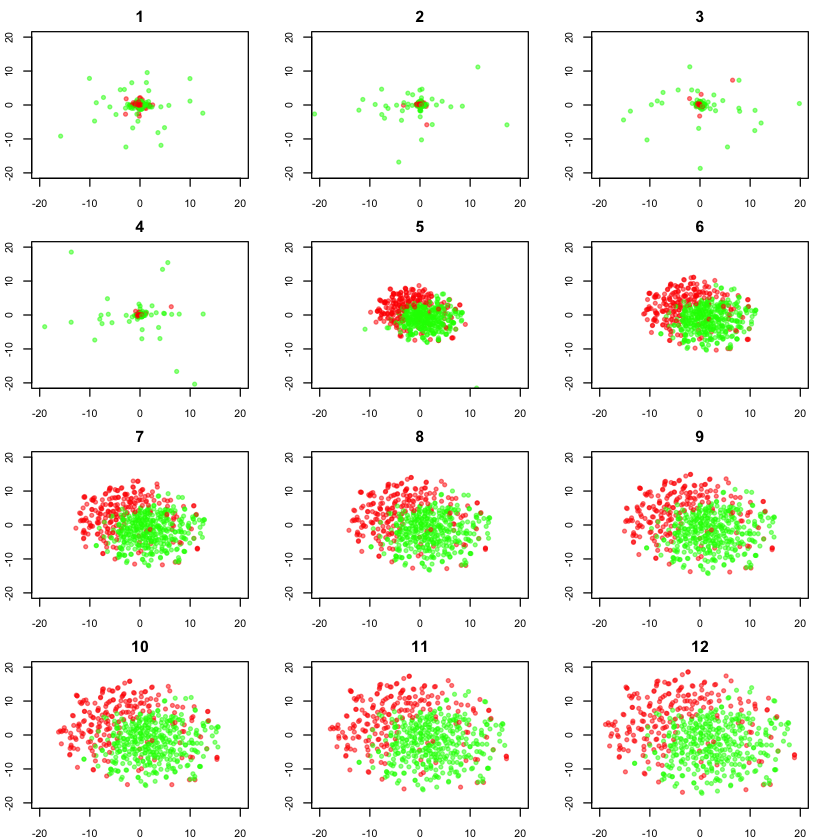

In [39]:
plot_cols <- 3
plot_rows <- floor(epoch_checkpoints / plot_cols) + ifelse(epoch_checkpoints %% plot_cols == 0, 0, 1)
par(mfrow = c(plot_rows, plot_cols), mar = rep(2, 4))

cols <- c(rgb(1, 0, 0, .5), rgb(0, 1, 0, .5))

plot_epochs <- function() {
    res <- lapply(
        1:length(tsne_epochs),
        function(e) {
            plot(
                tsne_epochs[[e]],
                pch = 20,
                cex = 1,
                col = cols[breast$y],
                cex.axis = .8,
                cex.lab = .8,
                xlim = c(-20, 20),
                ylim = c(-20, 20),
                xlab = "",
                ylab = "",
                main = e
            )
        } 
    )
}

plot_epochs()

#### Animated Plot

In [40]:
library(animation)

filename <- "tsne_breast.gif"
unlink(filename)

res <- suppressMessages(
    saveGIF(
      plot_epochs(),
      movie.name = filename,
      interval = .5,
      ani.width = 600, 
      ani.height = 600,
      autobrowse = F
    )
)

![](tsne_breast.gif)